## 2.2. Logistic Regression

### 로지스틱 회귀의 개념

In [1]:
import matplotlib.pyplot as  plt
import numpy as np

class Neuron:
    
    def __init__(self):
        self.w = 1.0     # 가중치를 초기화합니다
        self.b = 1.0     # 절편을 초기화합니다
    
    def forpass(self, x):
        y_hat = x * self.w + self.b       # 직선 방정식을 계산합니다
        return y_hat
    
    def backprop(self, x, err):
        w_grad = x * err    # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err    # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    def activation(self, z):
        return z
    
    def fit(self, x, y, epochs=200):
        for i in range(epochs):           # 에포크만큼 반복합니다
            for x_i, y_i in zip(x, y):    # 모든 샘플에 대해 반복합니다
                y_hat = self.forpass(x_i) # 정방향 계산
                y_hat = self.activation(y_hat)
                err = y_hat - y_i      # 오차 계산
                w_grad, b_grad = self.backprop(x_i, err)  # 역방향 계산
                self.w -= 0.01*w_grad          # 가중치 업데이트
                self.b -= 0.01*b_grad          # 절편 업데이트

1 : 양성종양
2 : 양성종양
3 : 양성종양
4 : 양성종양
5 : 악성종양
6 : 악성종양
7 : 악성종양
8 : 악성종양


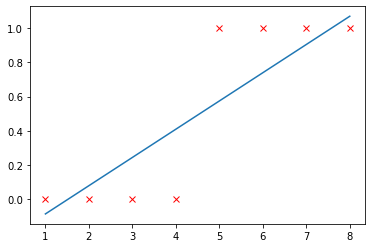

In [2]:
x = np.array([1,2,3,4,5,6,7,8])
y = np.array([0,0,0,0,1,1,1,1])
# x = np.array([1,2,3,4,5,6,7,8,10])
# y = np.array([0,0,0,0,1,1,1,1,1])                

neuron = Neuron()
neuron.fit(x, y)

for xi, yi in zip(x,y):
    plt.plot(xi,yi,"rx")

y_temp = []
for x_i in x:
    y_hat = neuron.forpass(x_i)
    if( y_hat >= 0.5 ):
        print("%d : 악성종양"%x_i)
    else:
        print("%d : 양성종양"%x_i)
    y_temp.append(y_hat)

plt.plot(x,y_temp)
plt.show()

#### odds 그래프

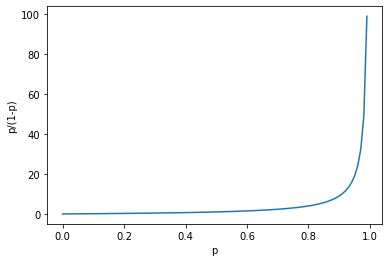

In [311]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
probs = np.arange(0, 1, 0.01)
odds = [p/(1-p) for p in probs]
plt.plot(probs, odds)
plt.xlabel('p')
plt.ylabel('p/(1-p)')
plt.show()

#### logit 그래프

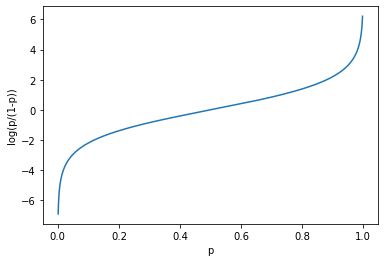

In [312]:
probs  = np.arange(0.001, 0.999, 0.001)
logit = [np.log(p/(1-p)) for p in probs]
plt.plot(probs, logit)
plt.xlabel('p')
plt.ylabel('log(p/(1-p))')
plt.show()

#### Sigmoid 그래프

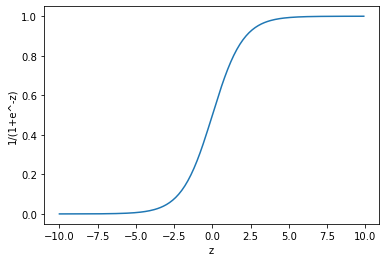

In [313]:
zs = np.arange(-10., 10., 0.1)
gs = [1/(1+np.exp(-z)) for z in zs]
plt.plot(zs, gs)
plt.xlabel('z')
plt.ylabel('1/(1+e^-z)')
plt.show()

#### -log() 그래프 

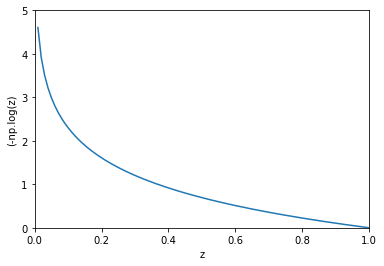

In [314]:
zs = np.arange(0.01, 10., 0.01)
gs = [-np.log(z) for z in zs]
plt.plot(zs, gs)
plt.xlim(0,1)
plt.ylim(0,5)
plt.xlabel('z')
plt.ylabel('(-np.log(z)')
plt.show()

<ipython-input-315-eb089b7e7040>:2: RuntimeWarning: divide by zero encountered in log
  gs = [-np.log(1-z) for z in zs ]
<ipython-input-315-eb089b7e7040>:2: RuntimeWarning: invalid value encountered in log
  gs = [-np.log(1-z) for z in zs ]


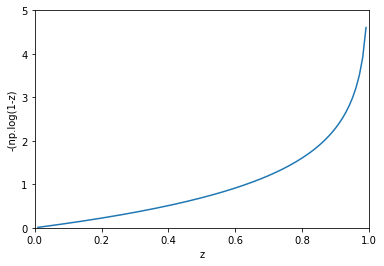

In [315]:
zs = np.arange(0.01, 10., 0.01)
gs = [-np.log(1-z) for z in zs ]
plt.plot(zs, gs)
plt.xlim(0,1)
plt.ylim(0,5)
plt.xlabel('z')
plt.ylabel('-(np.log(1-z)')
plt.show()

1 : 양성종양
2 : 양성종양
3 : 양성종양
4 : 양성종양
5 : 악성종양
6 : 악성종양
7 : 악성종양
8 : 악성종양


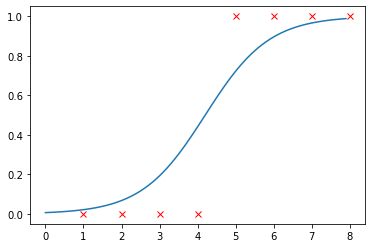

In [316]:
import matplotlib.pyplot as  plt
import numpy as np

class Neuron:
    
    def __init__(self):
        self.w = 1.0     # 가중치를 초기화합니다
        self.b = 1.0     # 절편을 초기화합니다
    
    def forpass(self, x):
        z = x * self.w + self.b       # 직선 방정식을 계산합니다
        return z
    
    def backprop(self, x, err):
        w_grad = x * err    # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err    # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    def activation(self, z):
#         a = z;
        a = 1/(1+np.exp(-z))
        return a
    
    def fit(self, x, y, epochs=200):
        for i in range(epochs):           # 에포크만큼 반복합니다
            for x_i, y_i in zip(x, y):    # 모든 샘플에 대해 반복합니다
                z = self.forpass(x_i) # 정방향 계산
                a = self.activation(z)
                err = a - y_i       # 오차 계산
                w_grad, b_grad = self.backprop(x_i, err)  # 역방향 계산
                self.w -= 0.01*w_grad          # 가중치 업데이트
                self.b -= 0.01*b_grad          # 절편 업데이트

x = np.array([1,2,3,4,5,6,7,8])
y = np.array([0,0,0,0,1,1,1,1])
# x = np.array([1,2,3,4,5,6,7,8,20])
# y = np.array([0,0,0,0,1,1,1,1,1])                

neuron = Neuron()
neuron.fit(x, y, epochs=1000)

for xi, yi in zip(x,y):
    plt.plot(xi,yi,"rx")

for x_i in x:
    y_hat = neuron.forpass(x_i)
    a = neuron.activation(y_hat)
    if( a >= 0.5 ):
        print("%d : 악성종양"%x_i)
    else:
        print("%d : 양성종양"%x_i)
    y_temp.append(a)

x = np.arange(0,x[-1],0.1)
y_temp = []
  
for i, x_i in enumerate(x):
    y_hat = neuron.forpass(x_i)
    a = neuron.activation(y_hat)
    y_temp.append(a)    
    
plt.plot(x,y_temp)
plt.show()

###  이진 분류 구현

In [317]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.data.shape, cancer.target.shape)

(569, 30) (569,)


In [318]:
cancer.data[:3]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [319]:
cancer.target[:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0])

In [320]:
x = cancer.data
print(x.shape)
y = cancer.target
print(y.ndim)

(569, 30)
1


In [321]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, 
                                                    test_size=0.2, random_state=42)

x_train = tf.constant(x_train, dtype=tf.float32)
x_test  = tf.constant(x_test, dtype=tf.float32)
y_train = tf.reshape(tf.constant(y_train, dtype=tf.float32), [len(y_train),1])
y_test  = tf.reshape(tf.constant(y_test , dtype=tf.float32), [len(y_test ),1])

In [322]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(455, 30) (114, 30)
(455, 1) (114, 1)


In [324]:
class LogisticModel(tf.Module):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

        self.w = None
        self.b = None
        self.epochs = 300
        self.batch = 100

    def init_weight(self, x):
        self.w = tf.Variable(tf.random.normal(shape=(x.shape[1], 1)))
        self.b = tf.Variable(0.0)
    
    def forpass(self, x):
        return tf.matmul(x, self.w) + self.b

    def loss(self, y_true, y_pred):
        bce = tf.keras.losses.BinaryCrossentropy(from_logits=True)
        a = bce(y_true, y_pred)
        return a
    
    def activation(self, x):
        a = tf.math.sigmoid(x)
        return a
    
    def predict(self, x):
        z = self.forpass(x)
        a = self.activation(z) 
        return a > 0.5

    def evaluate(self, x, y):
        result = np.mean(self.predict(x).numpy() == y.numpy())
        return result
    
    def train(self, x, y, learning_rate):
        with tf.GradientTape() as t:
            z = self.forpass(x)
#             a = self.activation(z)
            current_loss = self.loss(y, z)

        dw, db = t.gradient(current_loss, [self.w, self.b])
#         print(dw)
        model.w.assign_sub(learning_rate * dw)
        model.b.assign_sub(learning_rate * db)
        return current_loss
        
    def fit(self, x, y):
        self.init_weight(x)
        bin = len(x) // self.batch 
        if len(x) % self.batch > 0 :
            bin = bin + 1 

        for epoch in range(self.epochs):
            current_loss = 0
            for i in range(bin):
                x_batch = x[i*self.batch:(i+1)*self.batch]
                y_batch = y[i*self.batch:(i+1)*self.batch]
                current_loss += self.train(x_batch, y_batch, learning_rate=0.01).numpy()
            if epoch % 10 == 0:
                print("epoch=", epoch, "loss = ", current_loss/self.batch)

In [325]:
model = LogisticModel()
model.fit(x_train, y_train)

epoch= 0 loss =  66.17005249023437
epoch= 10 loss =  44.511803741455076
epoch= 20 loss =  27.210437622070312
epoch= 30 loss =  17.637071228027345
epoch= 40 loss =  2.9828327560424803
epoch= 50 loss =  2.616235656738281
epoch= 60 loss =  16.63283203125
epoch= 70 loss =  2.2529397773742676
epoch= 80 loss =  2.175254669189453
epoch= 90 loss =  2.0441586685180666
epoch= 100 loss =  2.3146054267883303
epoch= 110 loss =  2.246648139953613
epoch= 120 loss =  1.9470267868041993
epoch= 130 loss =  2.3812571144104004
epoch= 140 loss =  2.1477691078186036
epoch= 150 loss =  4.200151100158691
epoch= 160 loss =  24.672039794921876
epoch= 170 loss =  1.854018726348877
epoch= 180 loss =  1.725515365600586
epoch= 190 loss =  1.6950896072387696
epoch= 200 loss =  1.9230929374694825
epoch= 210 loss =  18.704136352539063
epoch= 220 loss =  2.1004755783081053
epoch= 230 loss =  2.0487331771850585
epoch= 240 loss =  1.7267287254333497
epoch= 250 loss =  2.2502088737487793
epoch= 260 loss =  2.1264667510986

In [326]:
model.evaluate(x_test, y_test)

0.8859649122807017

### 다중 분류 구현

이 예는 MNIST 손글씨 숫자를 사용합니다. 데이터 세트에는 학습용 예제 60,000 개와 테스트 용 예제 10,000 개가 포함되어 있습니다. 숫자는 0에서 255까지의 값을 가진 고정 크기 이미지 (28x28 픽셀)의 크기 정규화 및 중앙에 위치합니다.

이 예에서 각 이미지는 float32로 변환되고 [0, 1]로 정규화되고 784 개 피처 (28 * 28)의 1D 배열로 평면화됩니다.

![MNIST Dataset](http://neuralnetworksanddeeplearning.com/images/mnist_100_digits.png)

더 많은 정보 : http://yann.lecun.com/exdb/mnist/

In [327]:
import tensorflow as tf
import numpy as np

In [328]:
num_classes = 10 
num_features = 784 

learning_rate = 0.01
training_steps = 1000
batch_size = 256
display_step = 50

In [329]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

x_train, x_test = x_train / 255., x_test / 255.

In [330]:
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [331]:
W = tf.Variable(tf.ones([num_features, num_classes]), name="weight")
b = tf.Variable(tf.zeros([num_classes]), name="bias")

def logistic_regression(x):
    return tf.nn.softmax(tf.matmul(x, W) + b)

def cross_entropy(y_pred, y_true):
    y_true = tf.one_hot(y_true, depth=num_classes)
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred),1))

def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

optimizer = tf.optimizers.SGD(learning_rate)

In [332]:
def run_optimization(x, y):
    with tf.GradientTape() as g:
        pred = logistic_regression(x)
        loss = cross_entropy(pred, y)

    gradients = g.gradient(loss, [W, b])
    
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [333]:
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    run_optimization(batch_x, batch_y)
    
    if step % display_step == 0:
        pred = logistic_regression(batch_x)
        loss = cross_entropy(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))

step: 50, loss: 1.858162, accuracy: 0.753906
step: 100, loss: 1.582752, accuracy: 0.781250
step: 150, loss: 1.333724, accuracy: 0.816406
step: 200, loss: 1.152855, accuracy: 0.824219
step: 250, loss: 1.056305, accuracy: 0.843750
step: 300, loss: 1.005765, accuracy: 0.824219
step: 350, loss: 0.934468, accuracy: 0.851562
step: 400, loss: 0.898441, accuracy: 0.835938
step: 450, loss: 0.815442, accuracy: 0.863281
step: 500, loss: 0.794321, accuracy: 0.835938
step: 550, loss: 0.783496, accuracy: 0.820312
step: 600, loss: 0.781842, accuracy: 0.824219
step: 650, loss: 0.764753, accuracy: 0.835938
step: 700, loss: 0.640945, accuracy: 0.867188
step: 750, loss: 0.671570, accuracy: 0.867188
step: 800, loss: 0.688298, accuracy: 0.855469
step: 850, loss: 0.642941, accuracy: 0.882812
step: 900, loss: 0.581248, accuracy: 0.878906
step: 950, loss: 0.596696, accuracy: 0.871094
step: 1000, loss: 0.590413, accuracy: 0.875000


In [334]:
pred = logistic_regression(x_test)
print("Test Accuracy: %f" % accuracy(pred, y_test))

Test Accuracy: 0.870200


In [335]:
import matplotlib.pyplot as plt

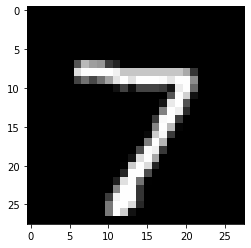

Model prediction: 7


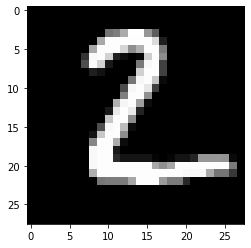

Model prediction: 2


In [336]:
n_images = 2
test_images = x_test[:n_images]
predictions = logistic_regression(test_images)

for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.show()
    print("Model prediction: %i" % np.argmax(predictions.numpy()[i]))